### Step 1: Data Pre-processing

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load MNIST data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to specify that it's a single channel image (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 2s 0us/step


### Step 2: Model Definition and Training

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 23s 9ms/step - loss: 0.2156 - accuracy: 0.9339 - val_loss: 0.0472 - val_accuracy: 0.9865
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0819 - accuracy: 0.9761 - val_loss: 0.0423 - val_accuracy: 0.9868
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0598 - accuracy: 0.9826 - val_loss: 0.0322 - val_accuracy: 0.9907
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.0311 - val_accuracy: 0.9905
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.0399 - val_accuracy: 0.9888
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0299 - val_accuracy: 0.9930
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0306 - val_accuracy

### Step 3: Evaluation with a Confusion Matrix
We will use TensorFlow Keras API to build the CNN model.



313/313 - 1s - loss: 0.0331 - accuracy: 0.9912 - 663ms/epoch - 2ms/step
Test accuracy: 0.9911999702453613
313/313 [==============================] - 1s 2ms/step


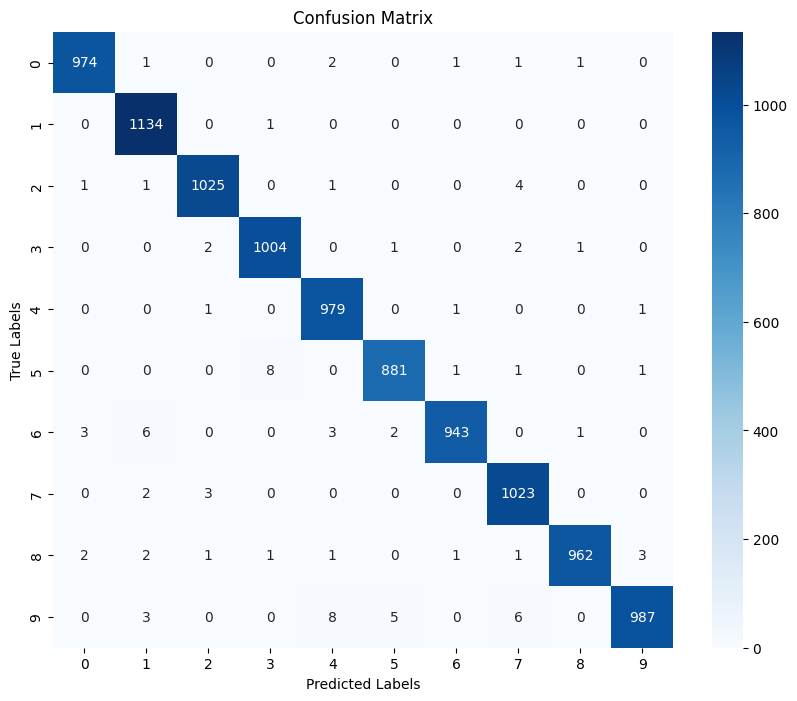

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Predict the values from the test dataset
test_pred = model.predict(test_images)
test_pred_classes = np.argmax(test_pred, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_true_classes, test_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Explanation of the Confusion Matrix:

Diagonal elements represent the number of correctly classified instances for each class.
Off-diagonal elements represent the number of misclassified instances.
Generally, a good confusion matrix will have high values on the diagonal and low values off the diagonal.
This indicates that the model is accurately classifying most of the instances.
